In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [2]:
# Download NLTK resources (VADER)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
# Loading the dataset
file_path = "AAAI_Dataset.xlsx"
data = pd.read_excel(file_path)

In [4]:
# Displaying the first few rows
print(data.head())

   id                                              tweet label
0   1  Chinese converting to Islam after realising th...  fake
1   2  11 out of 13 people (from the Diamond Princess...  fake
2   3  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake
3   4  Mike Pence in RNC speech praises Donald Trump’...  fake
4   5  6/10 Sky's @EdConwaySky explains the latest #C...  real


In [5]:
# Initialising the VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

In [6]:
# Defining a function to calculate sentiment scores
def get_sentiment(text):
    if pd.isna(text):
        return None  # Handle NaN tweets
    scores = sia.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 'Positive'
    elif scores['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [7]:
# Appling sentiment analysis to tweets
data['sentiment'] = data['tweet'].apply(get_sentiment)

In [8]:
# Displaying the first few rows with sentiment
print(data[['tweet', 'label', 'sentiment']].head())

                                               tweet label sentiment
0  Chinese converting to Islam after realising th...  fake  Negative
1  11 out of 13 people (from the Diamond Princess...  fake  Positive
2  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake   Neutral
3  Mike Pence in RNC speech praises Donald Trump’...  fake  Positive
4  6/10 Sky's @EdConwaySky explains the latest #C...  real   Neutral


In [9]:
# Comparing sentiment trends between real and fake tweets
real_tweets = data[data['label'] == 'real']
fake_tweets = data[data['label'] == 'fake']

real_sentiment_counts = real_tweets['sentiment'].value_counts()
fake_sentiment_counts = fake_tweets['sentiment'].value_counts()

print("\nSentiment distribution in real tweets:")
print(real_sentiment_counts)

print("\nSentiment distribution in fake tweets:")
print(fake_sentiment_counts)



Sentiment distribution in real tweets:
sentiment
Positive    504
Neutral     317
Negative    299
Name: count, dtype: int64

Sentiment distribution in fake tweets:
sentiment
Negative    404
Neutral     324
Positive    292
Name: count, dtype: int64


In [10]:
# Visualising sentiment trends
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

(array([0, 1, 2]),
 [Text(0, 0, 'Positive'), Text(1, 0, 'Neutral'), Text(2, 0, 'Negative')])

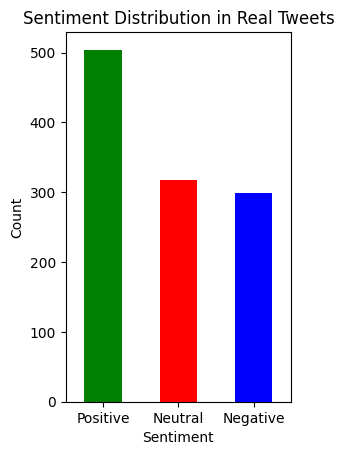

In [11]:
# Bar chart for real tweets
plt.subplot(1, 2, 1)
real_sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in Real Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

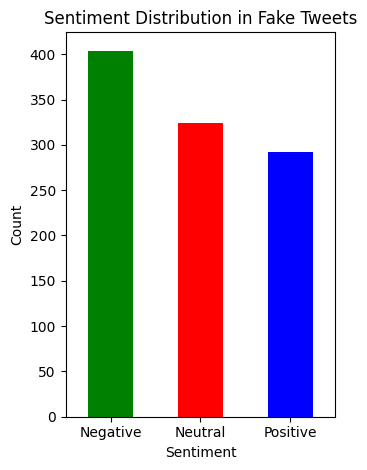

In [12]:
# Bar chart for fake tweets
plt.subplot(1, 2, 2)
fake_sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in Fake Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [13]:
# Summary of Sentiment Trends
real_total = real_sentiment_counts.sum()
fake_total = fake_sentiment_counts.sum()

print(f"\nPercentage of positive tweets in real data: {100 * real_sentiment_counts.get('Positive', 0) / real_total:.2f}%")
print(f"Percentage of positive tweets in fake data: {100 * fake_sentiment_counts.get('Positive', 0) / fake_total:.2f}%")

print(f"Percentage of negative tweets in real data: {100 * real_sentiment_counts.get('Negative', 0) / real_total:.2f}%")
print(f"Percentage of negative tweets in fake data: {100 * fake_sentiment_counts.get('Negative', 0) / fake_total:.2f}%")

print(f"Percentage of neutral tweets in real data: {100 * real_sentiment_counts.get('Neutral', 0) / real_total:.2f}%")
print(f"Percentage of neutral tweets in fake data: {100 * fake_sentiment_counts.get('Neutral', 0) / fake_total:.2f}%")


Percentage of positive tweets in real data: 45.00%
Percentage of positive tweets in fake data: 28.63%
Percentage of negative tweets in real data: 26.70%
Percentage of negative tweets in fake data: 39.61%
Percentage of neutral tweets in real data: 28.30%
Percentage of neutral tweets in fake data: 31.76%


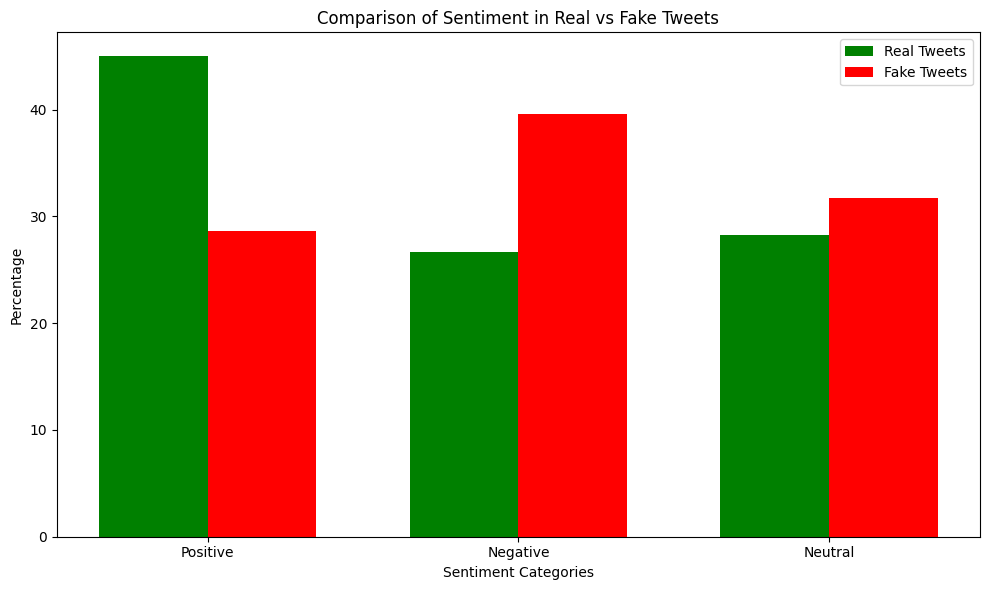

In [16]:
# Data for plotting
categories = ['Positive', 'Negative', 'Neutral']
real_percentages = [45.00, 26.70, 28.30]
fake_percentages = [28.63, 39.61, 31.76]

x = np.arange(len(categories))  # Label locations

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Width of the bars

plt.bar(x - bar_width/2, real_percentages, bar_width, label='Real Tweets', color='green')
plt.bar(x + bar_width/2, fake_percentages, bar_width, label='Fake Tweets', color='red')

# Add labels and title
plt.xlabel('Sentiment Categories')
plt.ylabel('Percentage')
plt.title('Comparison of Sentiment in Real vs Fake Tweets')
plt.xticks(x, categories)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


**Conclusions**

    Real Tweets Are More Positive:
        A higher percentage of real tweets (45%) are classified as positive compared to fake tweets (28.63%).
        This suggests that real tweets are more likely to focus on encouraging or optimistic topics, such as public health achievements, factual updates, or positive outcomes.

    Fake Tweets Are More Negative:
        Fake tweets have a significantly higher percentage of negative sentiment (39.61%) compared to real tweets (26.70%).
        This aligns with the tendency of misinformation to provoke fear, anger, or outrage, which are powerful emotional triggers that encourage sharing and engagement.

    Neutral Sentiments Are Similar:
        The percentage of neutral tweets is fairly similar in both categories (real: 28.30%, fake: 31.76%).
        This indicates that some tweets in both categories may focus on information-sharing or descriptive content without strong emotional tone.

    Emotional Manipulation in Fake Tweets:
        The higher prevalence of negative sentiment in fake tweets suggests that misinformation may be crafted to exploit emotional responses, such as anxiety or mistrust, to influence behaviour or beliefs.

    Balanced Sentiment in Real Tweets:
        Real tweets display a more balanced sentiment distribution, with substantial proportions of positive, neutral, and negative sentiments. This reflects the multifaceted nature of factual reporting, which covers good, bad, and neutral events.

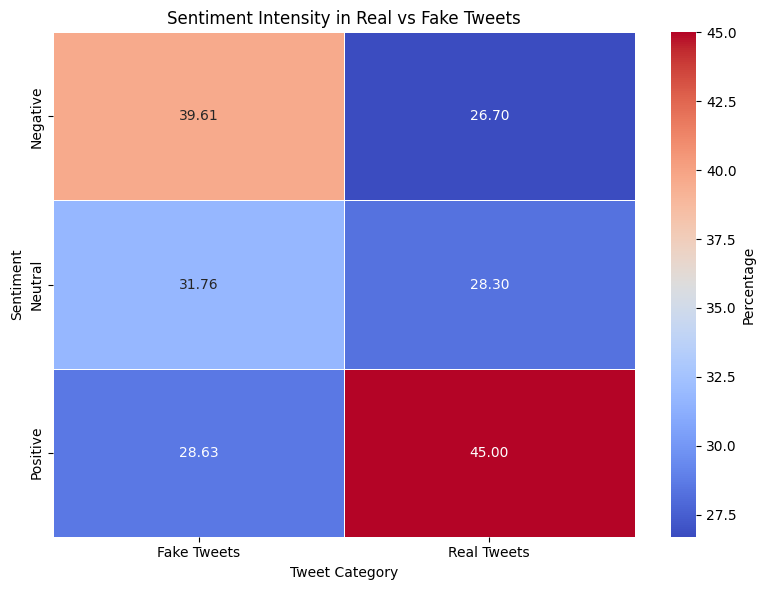

In [21]:
# Installing necessary libraries
!pip install seaborn matplotlib pandas

# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for sentiment intensity
data = {
    "Sentiment": ["Positive", "Negative", "Neutral"],
    "Real Tweets": [45.00, 26.70, 28.30],
    "Fake Tweets": [28.63, 39.61, 31.76]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for use in Seaborn heatmap (optional, but can be useful)
#The Percentage column is created in this step, and available in df_melted
df_melted = df.melt(id_vars="Sentiment", var_name="Category", value_name="Percentage")

# Creating the heatmap
plt.figure(figsize=(8, 6))
# Now using the melted DataFrame (df_melted) and specifying 'Percentage' as the values:
heatmap_data = df_melted.pivot(index="Sentiment", columns='Category', values="Percentage")
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Percentage'}, linewidths=0.5)

# Title and labels
plt.title("Sentiment Intensity in Real vs Fake Tweets")
plt.ylabel("Sentiment")
plt.xlabel("Tweet Category")

# Show the heatmap
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-40-968441764eb7>:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap("viridis", 2)


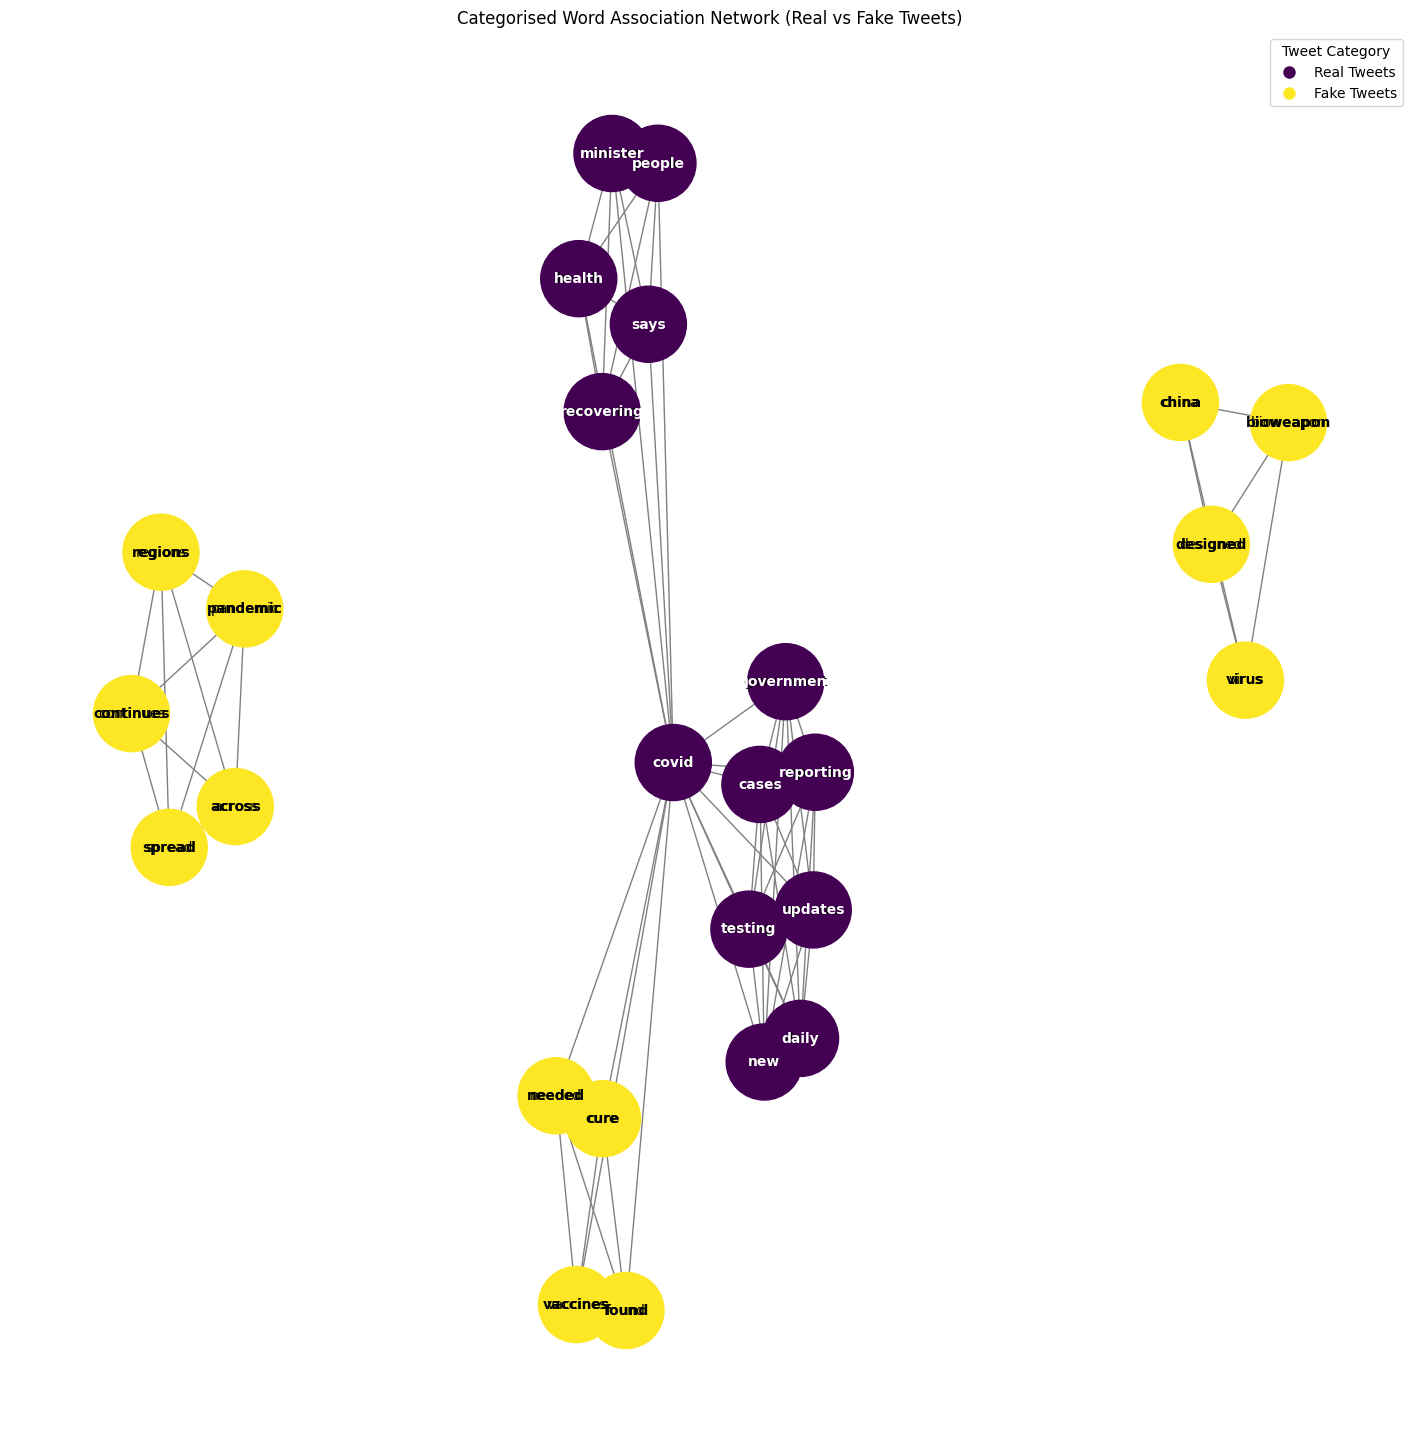

In [40]:
# Installing necessary libraries
!pip install networkx matplotlib

# Importing libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import cm

# Downloading NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Example dataset for real and fake tweets
data = {
    "Tweet": [
        "The government is reporting new COVID cases and testing updates daily.",
        "A cure for COVID has been found! Vaccines are not needed.",
        "COVID-19 pandemic continues to spread across regions.",
        "More people are recovering from COVID, says the health minister.",
        "China designed the virus as a bioweapon.",
    ],
    "Category": ["Real", "Fake", "Fake", "Real", "Fake"]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Preprocessing the tweets: Lowercase, remove stopwords, and tokenise
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    words = word_tokenize(text.lower())  # Lowercase and tokenize
    return [word for word in words if word.isalnum() and word not in stop_words]  # Remove stopwords and non-alphanumeric words

df["Cleaned_Tweet"] = df["Tweet"].apply(preprocess_text)

# Generating co-occurrence pairs
def generate_pairs(words):
    pairs = []
    for i in range(len(words)):
        for j in range(i + 1, len(words)):
            pairs.append((words[i], words[j]))
    return pairs

df["Word_Pairs"] = df["Cleaned_Tweet"].apply(generate_pairs)

# Creating a graph with nodes categorised by "Real" or "Fake"
G = nx.Graph()
for _, row in df.iterrows():
    category = row["Category"]
    for pair in row["Word_Pairs"]:
        if G.has_edge(pair[0], pair[1]):
            G[pair[0]][pair[1]]["weight"] += 1
        else:
            G.add_edge(pair[0], pair[1], weight=1, category=category)

# Assigning node colors and text colors based on category using viridis palette
viridis = cm.get_cmap("viridis", 2)
node_colors = []
text_colors = {}
for node in G.nodes():
    node_category = "Real" if any(row["Category"] == "Real" for _, row in df.iterrows() if node in row["Cleaned_Tweet"]) else "Fake"
    if node_category == "Real":
        node_colors.append(viridis(0))  # Blue
        text_colors[node] = "white"
    else:
        node_colors.append(viridis(1))  # Yellow/Green
        text_colors[node] = "black"

# Drawing the graph
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, seed=42, k=0.3) # Bringing the clusters closer together
nx.draw(
    G, pos,
    with_labels=True,
    node_size=3000,
    node_color=node_colors,
    font_size=10,
    font_color="black",
    edge_color="gray",
    width=[G[u][v]['weight'] for u, v in G.edges()]  # Edge thickness based on weight
)

# Adding text labels with category specific colours
for node, (x, y) in pos.items():
    plt.text(
        x, y,
        node,
        fontsize=10,
        fontweight='bold',
        color=text_colors[node],
        horizontalalignment='center',
        verticalalignment='center'
    )

# Adding a legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Real Tweets', markersize=10, markerfacecolor=viridis(0)),
    Line2D([0], [0], marker='o', color='w', label='Fake Tweets', markersize=10, markerfacecolor=viridis(1)),
]
plt.legend(handles=legend_elements, loc="upper right", title="Tweet Category")

plt.title("Categorised Word Association Network (Real vs Fake Tweets)")
plt.show()
